In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data = data.drop(['id','Unnamed: 32'], axis = 1)
names_of_cols = ['radius', 'texture', 
                 'perimeter', 'area', 
                 'smoothness', 'compactness', 
                 'concavity', 'concave points',
                 'symmetry', 'fractal_dimension']

for name in names_of_cols:
    data[name] = sum(data[name + '_mean'], data[name + '_worst'])/2
    data.drop(columns=name + '_mean', axis=1, inplace=True)
    data.drop(columns=name + '_worst', axis=1, inplace=True)

data.drop(columns=['radius', 'area'], axis=1, inplace=True)
data.drop(columns=['radius_se', 'area_se'], axis=1, inplace=True)

In [5]:
data = data.replace({'diagnosis':{'M':1, 'B':0}})
data['diagnosis'] = pd.to_numeric(data['diagnosis'])


k = 8 
corr = data.corr()
cols = corr.nlargest(k, 'diagnosis')['diagnosis'].index.tolist() # 10 наиболее скореллированных признаков с целевой переменной
data

,diagnosis,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture,perimeter,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,1,0.9053,8.589,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,5496.570,26257.490,27.49560,30.01781,25.619355,14.050197,51.77060,17.925370
1,1,0.7339,3.398,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,5499.610,26244.590,27.47640,29.77831,25.384205,14.010497,51.67805,17.910430
2,1,0.7869,4.585,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,5500.670,26241.440,27.48670,29.89726,25.488605,14.038997,51.72120,17.909710
3,1,1.1560,3.445,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,5501.155,26214.625,27.51940,30.11816,25.606855,14.046247,51.87245,17.952420
4,1,0.7813,5.438,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,5496.240,26241.290,27.48320,29.78751,25.463405,13.998747,51.65875,17.904310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1.2560,7.673,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,5501.105,26248.240,27.48500,29.79066,25.468755,14.028297,51.64355,17.901495
565,1,2.4630,5.203,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,5507.030,26242.690,27.47280,29.78111,25.424155,13.998897,51.66915,17.899105
566,1,1.0750,3.425,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,5504.965,26228.540,27.47145,29.83971,25.433555,13.988397,51.65145,17.905020
567,1,1.5950,5.772,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,5507.615,26257.490,27.49700,30.11906,25.732755,14.049997,51.74490,17.927920


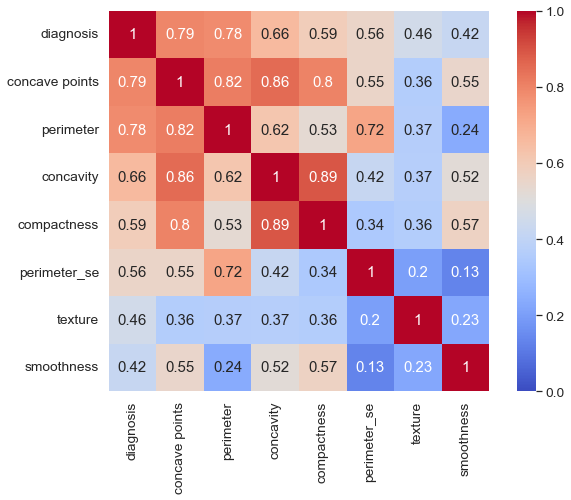

In [6]:
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm,yticklabels=cols, xticklabels=cols, square=True, annot=True, cmap=sns.color_palette('coolwarm',1000), vmin=0, center=0.5)
plt.show()

In [7]:
#sns.pairplot(data[cols], hue='diagnosis')

In [8]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, 'texture_se':], 
                                                    data['diagnosis'], 
                                                    test_size=0.3, random_state=729)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.metrics import precision_recall_fscore_support

In [56]:

neighbors = range(1, 50)

reports = {'precision':[],'recall':[],'fscore':[],'k':[]}

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_train)
    preds_test = knn.predict(X_test)
    
    scorings = precision_recall_fscore_support(preds_test, y_test, average='macro')
    reports['precision'].append(scorings[0])
    reports['recall'].append(scorings[1])
    reports['fscore'].append(scorings[2])
    reports['k'].append(k)

df = pd.DataFrame(reports)
print(df.iloc[df['precision'].argmax()])
print(df.iloc[df['recall'].argmax()])
print(df.iloc[df['fscore'].argmax()])
df.head()

precision    0.910790
recall       0.948678
fscore       0.925936
k            9.000000
Name: 8, dtype: float64
precision    0.910790
recall       0.948678
fscore       0.925936
k            9.000000
Name: 8, dtype: float64
precision    0.910790
recall       0.948678
fscore       0.925936
k            9.000000
Name: 8, dtype: float64


,precision,recall,fscore,k
0,0.880448,0.910784,0.892790,1
1,0.859942,0.925644,0.881911,2
2,0.885366,0.936942,0.904301,3
3,0.876892,0.933130,0.896926,4
4,0.872427,0.922272,0.890630,5


In [57]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test)
print("Resulting test score: {:.3f}".format(recall_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.935, best CV k: 5


NameError: name 'recall_score' is not defined